<a href="https://colab.research.google.com/github/knandagiri/data-repo/blob/master/M0_Practice_04_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Practice Notebook: Data Wrangling (Ungraded)

## Learning Objectives

At the end of the experiment, you will be able to :

* load the dataframe using pandas
* perform various operations in the dataframe like:
     * renaming the columns,
     * indexing and data retrieval (both column wise and row wise),
     * drop and add a columns in the dataframe,
     * integration of datasets,
     * data cleaning,  
     * data tansformation operations like standardization, label encoding, feature scaling, etc,
     * find the correlation among different features of dataset.

#### Exercise 1: Loading the data using Dataframe

In [ ]:
# pandas
import pandas as pd
# numpy
import numpy as np

Dataset is chosen from the [UCI repository](http://archive.ics.uci.edu/ml/datasets/Forest+Fires)

#### Dataset Description

#### **Forest Fires Dataset**
1. Number of Instances: 517
2. Number of Attributes: 13
3. Attribute Information:
    
      i. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

      ii. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

      iii. month - month of the year: 'jan' to 'dec'

      iv. day - day of the week: 'mon' to 'sun'
      
      v. FFMC - FFMC index from the FWI system: 18.7 to 96.20

      vi. DMC - DMC index from the FWI system: 1.1 to 291.3
      
      vii. DC - DC index from the FWI system: 7.9 to 860.6

      viii. ISI - ISI index from the FWI system: 0.0 to 56.10
     
     ix. te mp - temperature in Celsius degrees: 2.2 to 33.30
      
      x. RH - relative humidity in %: 15.0 to 100
      
      xi. wind - wind speed in km/h: 0.40 to 9.40
      
      xii. rain - outside rain in mm/m2 : 0.0 to 6.4
      
      xiii. area - the burned area of the forest (in ha): 0.00 to 1090.84 

In [ ]:
# download the data
!wget -qq https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

In [ ]:
# setting up headers
fire_headers = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

In [ ]:
# applying headers and inspecting for accuracy 
df = pd.read_csv('forestfires.csv', names=fire_headers)
# display first 5 rows of the dataset
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
4,8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0


In the above dataframe, first row contains the duplicate headers, skip the header using `skiprows`

In [ ]:
# using pandas read the csv file
df = pd.read_csv('forestfires.csv',skiprows=1, names=fire_headers)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Exercise 2: Rename the columns

Based on the dataset attributes, we will rename RH column to Relative Humidity and other columns

In [ ]:
# rename the columns
df = df.rename(columns = {'RH':'Relative Humidity', 'X':'X-axis', 'Y':'Y-axis'})
df.head()

,X-axis,Y-axis,month,day,FFMC,DMC,DC,ISI,temp,Relative Humidity,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Exercise 3: Indexing and data retrieval

In [ ]:
# setting temp as index column
df.set_index("temp", inplace = True)
df.head()

,X-axis,Y-axis,month,day,FFMC,DMC,DC,ISI,Relative Humidity,wind,rain,area
temp,,,,,,,,,,,,
8.2,7,5,mar,fri,86.2,26.2,94.3,5.1,51,6.7,0.0,0.0
18.0,7,4,oct,tue,90.6,35.4,669.1,6.7,33,0.9,0.0,0.0
14.6,7,4,oct,sat,90.6,43.7,686.9,6.7,33,1.3,0.0,0.0
8.3,8,6,mar,fri,91.7,33.3,77.5,9.0,97,4.0,0.2,0.0
11.4,8,6,mar,sun,89.3,51.3,102.2,9.6,99,1.8,0.0,0.0


Earlier the index is temp column, it can be removed by resetting the index.

In [ ]:
# resetting index
df.reset_index(inplace = True)
df.head()

,temp,X-axis,Y-axis,month,day,FFMC,DMC,DC,ISI,Relative Humidity,wind,rain,area
0,8.2,7,5,mar,fri,86.2,26.2,94.3,5.1,51,6.7,0.0,0.0
1,18.0,7,4,oct,tue,90.6,35.4,669.1,6.7,33,0.9,0.0,0.0
2,14.6,7,4,oct,sat,90.6,43.7,686.9,6.7,33,1.3,0.0,0.0
3,8.3,8,6,mar,fri,91.7,33.3,77.5,9.0,97,4.0,0.2,0.0
4,11.4,8,6,mar,sun,89.3,51.3,102.2,9.6,99,1.8,0.0,0.0


Retrieve column-wise  data from the dataframe

In [ ]:
# retrieving columns
X1 = df["wind"]
print(X1)

0      6.7
1      0.9
2      1.3
3      4.0
4      1.8
      ... 
512    2.7
513    5.8
514    6.7
515    4.0
516    4.5
Name: wind, Length: 517, dtype: float64


In [ ]:
# retrieving multiple columns
X2 = df[["wind", "rain", "area"]]
print(X2)

     wind  rain   area
0     6.7   0.0   0.00
1     0.9   0.0   0.00
2     1.3   0.0   0.00
3     4.0   0.2   0.00
4     1.8   0.0   0.00
..    ...   ...    ...
512   2.7   0.0   6.44
513   5.8   0.0  54.29
514   6.7   0.0  11.16
515   4.0   0.0   0.00
516   4.5   0.0   0.00

[517 rows x 3 columns]


`loc` is label-based, which means that you have to specify rows and columns based on their row and column labels.

syntax: ` loc[row_label, column_label]`

In [ ]:
# retrieving rows by loc method
rows_1 = df.loc[[4,5,6,7,8,9,10],'temp']
print(rows_1)

4     11.4
5     22.2
6     24.1
7      8.0
8     13.1
9     22.8
10    17.8
Name: temp, dtype: float64


`iloc` is integer position-based, so you have to specify rows and columns by their integer position values (0-based integer position).

syntax: `iloc[row_position, column_position]`

In [ ]:
# retrieving data using integer location
sub_data = df.iloc[0:10,:3]
sub_data

,temp,X-axis,Y-axis
0,8.2,7,5
1,18.0,7,4
2,14.6,7,4
3,8.3,8,6
4,11.4,8,6
5,22.2,8,6
6,24.1,8,6
7,8.0,8,6
8,13.1,8,6
9,22.8,7,5


Index of a dataframe

In [ ]:
# start the index from 1
df.index = range(1,len(df)+1)
df

,temp,X-axis,Y-axis,month,day,FFMC,DMC,DC,ISI,Relative Humidity,wind,rain,area
1,8.2,7,5,mar,fri,86.2,26.2,94.3,5.1,51,6.7,0.0,0.00
2,18.0,7,4,oct,tue,90.6,35.4,669.1,6.7,33,0.9,0.0,0.00
3,14.6,7,4,oct,sat,90.6,43.7,686.9,6.7,33,1.3,0.0,0.00
4,8.3,8,6,mar,fri,91.7,33.3,77.5,9.0,97,4.0,0.2,0.00
5,11.4,8,6,mar,sun,89.3,51.3,102.2,9.6,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,27.8,4,3,aug,sun,81.6,56.7,665.6,1.9,32,2.7,0.0,6.44
514,21.9,2,4,aug,sun,81.6,56.7,665.6,1.9,71,5.8,0.0,54.29
515,21.2,7,4,aug,sun,81.6,56.7,665.6,1.9,70,6.7,0.0,11.16
516,25.6,1,4,aug,sat,94.4,146.0,614.7,11.3,42,4.0,0.0,0.00


#### Exercise 4: Drop the columns

* Identify the irrelevant columns and drop

day and month can be added into one single column by dropping

In [ ]:
# new column date
df['date'] = df['day']+", "+df['month']
df

,temp,X-axis,Y-axis,month,day,FFMC,DMC,DC,ISI,Relative Humidity,wind,rain,area,date
1,8.2,7,5,mar,fri,86.2,26.2,94.3,5.1,51,6.7,0.0,0.00,"fri, mar"
2,18.0,7,4,oct,tue,90.6,35.4,669.1,6.7,33,0.9,0.0,0.00,"tue, oct"
3,14.6,7,4,oct,sat,90.6,43.7,686.9,6.7,33,1.3,0.0,0.00,"sat, oct"
4,8.3,8,6,mar,fri,91.7,33.3,77.5,9.0,97,4.0,0.2,0.00,"fri, mar"
5,11.4,8,6,mar,sun,89.3,51.3,102.2,9.6,99,1.8,0.0,0.00,"sun, mar"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,27.8,4,3,aug,sun,81.6,56.7,665.6,1.9,32,2.7,0.0,6.44,"sun, aug"
514,21.9,2,4,aug,sun,81.6,56.7,665.6,1.9,71,5.8,0.0,54.29,"sun, aug"
515,21.2,7,4,aug,sun,81.6,56.7,665.6,1.9,70,6.7,0.0,11.16,"sun, aug"
516,25.6,1,4,aug,sat,94.4,146.0,614.7,11.3,42,4.0,0.0,0.00,"sat, aug"


In [ ]:
# drop columns 
df.drop(["day",'month'], axis = 1, inplace=True)
df.head()

,temp,X-axis,Y-axis,FFMC,DMC,DC,ISI,Relative Humidity,wind,rain,area,date
1,8.2,7,5,86.2,26.2,94.3,5.1,51,6.7,0.0,0.0,"fri, mar"
2,18.0,7,4,90.6,35.4,669.1,6.7,33,0.9,0.0,0.0,"tue, oct"
3,14.6,7,4,90.6,43.7,686.9,6.7,33,1.3,0.0,0.0,"sat, oct"
4,8.3,8,6,91.7,33.3,77.5,9.0,97,4.0,0.2,0.0,"fri, mar"
5,11.4,8,6,89.3,51.3,102.2,9.6,99,1.8,0.0,0.0,"sun, mar"


#### Exercise 5: Data Integration

Create the two dataframes representing different information and combine them as one dataframe

In [ ]:
# Students dataframe
df1 = pd.DataFrame({"Name": ["Aman", "Joy", "Vinay", "Jack", "Rita", "Robin", "Sam"], 
                    "Rollno": [1, 2, 3, 4, 5, 6, 7]})
df1

,Name,Rollno
0,Aman,1
1,Joy,2
2,Vinay,3
3,Jack,4
4,Rita,5
5,Robin,6
6,Sam,7


In [ ]:
# Marks dataframe
df2 = pd.DataFrame({"Rollno": [1, 2, 3, 4, 5, 6, 7],
                    "Maths": [40, 50, 30, 60, 82, 74, 25],
                    "English": [90, 84, 48, 64, 45, np.nan, 46],
                    "Science": [66, 54, 20, np.nan, 90, 48, 28]})
df2

,Rollno,Maths,English,Science
0,1,40,90.0,66.0
1,2,50,84.0,54.0
2,3,30,48.0,20.0
3,4,60,64.0,NaN
4,5,82,45.0,90.0
5,6,74,NaN,48.0
6,7,25,46.0,28.0


Merge both the dataframes side by side, as they are representing different information with common identifier `Rollno`

In [ ]:
# Merge df1 and df2 on the 'Rollno' and 'Roll No' columns
df_merge = pd.merge(df1, df2, on=['Rollno'])
df_merge

,Name,Rollno,Maths,English,Science
0,Aman,1,40,90.0,66.0
1,Joy,2,50,84.0,54.0
2,Vinay,3,30,48.0,20.0
3,Jack,4,60,64.0,NaN
4,Rita,5,82,45.0,90.0
5,Robin,6,74,NaN,48.0
6,Sam,7,25,46.0,28.0


To know more about other merge operations, click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html).

In [ ]:
# Combine two dataframes along columns
df_concat = pd.concat([df1, df2],axis=1)
df_concat

,Name,Rollno,Rollno,Maths,English,Science
0,Aman,1,1,40,90.0,66.0
1,Joy,2,2,50,84.0,54.0
2,Vinay,3,3,30,48.0,20.0
3,Jack,4,4,60,64.0,NaN
4,Rita,5,5,82,45.0,90.0
5,Robin,6,6,74,NaN,48.0
6,Sam,7,7,25,46.0,28.0


To know more about other concat operations, click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html).

#### Exercise 6: Data Cleaning

In [ ]:
# Check for missing values
df_merge.isna()

,Name,Rollno,Maths,English,Science
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,False
5,False,False,False,True,False
6,False,False,False,False,False


In [ ]:
# Count missing values
df_merge.isna().sum()

Name       0
Rollno     0
Maths      0
English    1
Science    1
dtype: int64

In [ ]:
# Show the mean of each column
df_merge.mean()

Rollno      4.000000
Maths      51.571429
English    62.833333
Science    51.000000
dtype: float64

In [ ]:
# Filling missing values with the mean value of that column
df_filled = df_merge.fillna(df_merge.mean())
df_filled

,Name,Rollno,Maths,English,Science
0,Aman,1,40,90.000000,66.0
1,Joy,2,50,84.000000,54.0
2,Vinay,3,30,48.000000,20.0
3,Jack,4,60,64.000000,51.0
4,Rita,5,82,45.000000,90.0
5,Robin,6,74,62.833333,48.0
6,Sam,7,25,46.000000,28.0


#### Exercise 7: Data Transformation

Create a Total marks column and identify the Result based on the marks

In [ ]:
# Add 'Total' marks column 
df_filled["Total"] = df_filled.iloc[:, -3:].sum(axis=1)
df_filled

,Name,Rollno,Maths,English,Science,Total
0,Aman,1,40,90.000000,66.0,196.000000
1,Joy,2,50,84.000000,54.0,188.000000
2,Vinay,3,30,48.000000,20.0,98.000000
3,Jack,4,60,64.000000,51.0,175.000000
4,Rita,5,82,45.000000,90.0,217.000000
5,Robin,6,74,62.833333,48.0,184.833333
6,Sam,7,25,46.000000,28.0,99.000000


In [ ]:
# Add 'Result' column
for i in range(len(df_filled)):
    # consider above 35% as pass out of total 300 marks
    if df_filled.loc[i, "Total"] > (0.35 * 300):
        df_filled.loc[i, "Result"] = "Pass"
    else:
        df_filled.loc[i, "Result"] = "Fail"
df_filled

,Name,Rollno,Maths,English,Science,Total,Result
0,Aman,1,40,90.000000,66.0,196.000000,Pass
1,Joy,2,50,84.000000,54.0,188.000000,Pass
2,Vinay,3,30,48.000000,20.0,98.000000,Fail
3,Jack,4,60,64.000000,51.0,175.000000,Pass
4,Rita,5,82,45.000000,90.0,217.000000,Pass
5,Robin,6,74,62.833333,48.0,184.833333,Pass
6,Sam,7,25,46.000000,28.0,99.000000,Fail


**LabelEncoder:** Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [ ]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_filled["Result"])
label = le.transform(df_filled["Result"])
df_filled["Result label"] = label
df_filled

,Name,Rollno,Maths,English,Science,Total,Result,Result label
0,Aman,1,40,90.000000,66.0,196.000000,Pass,1
1,Joy,2,50,84.000000,54.0,188.000000,Pass,1
2,Vinay,3,30,48.000000,20.0,98.000000,Fail,0
3,Jack,4,60,64.000000,51.0,175.000000,Pass,1
4,Rita,5,82,45.000000,90.0,217.000000,Pass,1
5,Robin,6,74,62.833333,48.0,184.833333,Pass,1
6,Sam,7,25,46.000000,28.0,99.000000,Fail,0


To know more about LabelEncoder, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

**Feature Scaling:** It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

To know more about StandardScaler, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
# StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

df_scaled_sc = df_filled.copy()

#defining the StandardScaler variable
sc = StandardScaler()
sc.fit(df_scaled_sc[["Maths", "English", "Science"]])

# using .transform to apply StandardScaler operation 
scaled = sc.transform(df_scaled_sc[["Maths", "English", "Science"]])
df_scaled_sc[["Maths_scaled_StandardScaler", "English_scaled_StandardScaler", "Science_scaled_StandardScaler"]] = scaled
df_scaled_sc

,Name,Rollno,Maths,English,Science,Total,Result,Result label,Maths_scaled_StandardScaler,English_scaled_StandardScaler,Science_scaled_StandardScaler
0,Aman,1,40,90.000000,66.0,196.000000,Pass,1,-0.577776,1.603664e+00,0.695715
1,Joy,2,50,84.000000,54.0,188.000000,Pass,1,-0.078463,1.249481e+00,0.139143
2,Vinay,3,30,48.000000,20.0,98.000000,Fail,0,-1.077089,-8.756203e-01,-1.437811
3,Jack,4,60,64.000000,51.0,175.000000,Pass,1,0.420849,6.886901e-02,0.000000
4,Rita,5,82,45.000000,90.0,217.000000,Pass,1,1.519337,-1.052712e+00,1.808860
5,Robin,6,74,62.833333,48.0,184.833333,Pass,1,1.119887,4.194375e-16,-0.139143
6,Sam,7,25,46.000000,28.0,99.000000,Fail,0,-1.326745,-9.936815e-01,-1.066763


To know more about MinMaxScaler, check this [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
# MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

df_scaled_mms = df_filled.copy()

mms = MinMaxScaler()
# transform features by scaling each feature to a given range e.g. [0,1]
mms.fit(df_scaled_mms[["Maths", "English", "Science"]])

scaled = mms.transform(df_scaled_mms[["Maths", "English", "Science"]])
df_scaled_mms[["Maths_scaled_MinMaxScaler", "English_scaled_MinMaxScaler", "Science_scaled_MinMaxScaler"]] = scaled
df_scaled_mms

,Name,Rollno,Maths,English,Science,Total,Result,Result label,Maths_scaled_MinMaxScaler,English_scaled_MinMaxScaler,Science_scaled_MinMaxScaler
0,Aman,1,40,90.000000,66.0,196.000000,Pass,1,0.263158,1.000000,0.657143
1,Joy,2,50,84.000000,54.0,188.000000,Pass,1,0.438596,0.866667,0.485714
2,Vinay,3,30,48.000000,20.0,98.000000,Fail,0,0.087719,0.066667,0.000000
3,Jack,4,60,64.000000,51.0,175.000000,Pass,1,0.614035,0.422222,0.442857
4,Rita,5,82,45.000000,90.0,217.000000,Pass,1,1.000000,0.000000,1.000000
5,Robin,6,74,62.833333,48.0,184.833333,Pass,1,0.859649,0.396296,0.400000
6,Sam,7,25,46.000000,28.0,99.000000,Fail,0,0.000000,0.022222,0.114286


#### Exercise 8: Features correlation

**Data Correlation:** Is a way to understand the relationship between multiple variables and attributes in your dataset. Using Correlation, you can get some insights such as:
One or multiple attributes depend on another attribute or a cause for another attribute.
One or multiple attributes are associated with other attributes.

In [ ]:
# Correlation between features
df_scaled_sc.corr()

,Rollno,Maths,English,Science,Total,Result label,Maths_scaled_StandardScaler,English_scaled_StandardScaler,Science_scaled_StandardScaler
Rollno,1.000000,0.196159,-0.747721,-0.185524,-0.289724,-0.316228,0.196159,-0.747721,-0.185524
Maths,0.196159,1.000000,-0.047651,0.734790,0.797493,0.760159,1.000000,-0.047651,0.734790
English,-0.747721,-0.047651,1.000000,0.243477,0.482997,0.591125,-0.047651,1.000000,0.243477
Science,-0.185524,0.734790,0.243477,1.000000,0.918914,0.792016,0.734790,0.243477,1.000000
Total,-0.289724,0.797493,0.482997,0.918914,1.000000,0.962427,0.797493,0.482997,0.918914
Result label,-0.316228,0.760159,0.591125,0.792016,0.962427,1.000000,0.760159,0.591125,0.792016
Maths_scaled_StandardScaler,0.196159,1.000000,-0.047651,0.734790,0.797493,0.760159,1.000000,-0.047651,0.734790
English_scaled_StandardScaler,-0.747721,-0.047651,1.000000,0.243477,0.482997,0.591125,-0.047651,1.000000,0.243477
Science_scaled_StandardScaler,-0.185524,0.734790,0.243477,1.000000,0.918914,0.792016,0.734790,0.243477,1.000000


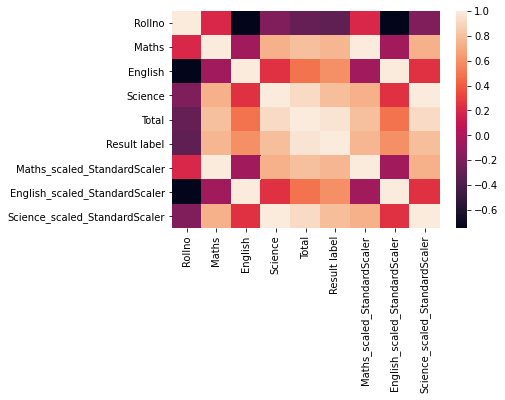

In [ ]:
# Heatmap of correlation matrix
import seaborn as sns
sns.heatmap(df_scaled_sc.corr())

In [ ]:
# Change the marks to 35 if it is below 35 for all three subjects
df = df_filled[["Maths", "English", "Science"]]
# Marks below 35
df.mask(df < 35)

,Maths,English,Science
0,40.0,90.000000,66.0
1,50.0,84.000000,54.0
2,NaN,48.000000,NaN
3,60.0,64.000000,51.0
4,82.0,45.000000,90.0
5,74.0,62.833333,48.0
6,NaN,46.000000,NaN


In [ ]:
# Assign marks
df.mask(df < 35, 35)

,Maths,English,Science
0,40,90.000000,66.0
1,50,84.000000,54.0
2,35,48.000000,35.0
3,60,64.000000,51.0
4,82,45.000000,90.0
5,74,62.833333,48.0
6,35,46.000000,35.0


To know more about df.mask() operation, click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mask.html).